# Datasets

In [ ]:
import numpy as np
import pandas as pd

: 

## From HuggingFace

In [2]:
from huggingface_hub import list_datasets

/Users/wpcasas/.local/share/virtualenvs/transformers-mQ9tXch0/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
all_datasets = list(list_datasets())

In [4]:
len(all_datasets)

127684

In [5]:
all_datasets[:5]

[DatasetInfo(id='acronym_identification', author=None, sha='15ef643450d589d5883e289ffadeb03563e80a9e', created_at=datetime.datetime(2022, 3, 2, 23, 29, 22, tzinfo=datetime.timezone.utc), last_modified=datetime.datetime(2024, 1, 9, 11, 39, 57, tzinfo=datetime.timezone.utc), private=False, gated=False, disabled=False, downloads=988, likes=18, paperswithcode_id='acronym-identification', tags=['task_categories:token-classification', 'annotations_creators:expert-generated', 'language_creators:found', 'multilinguality:monolingual', 'size_categories:10K<n<100K', 'source_datasets:original', 'language:en', 'license:mit', 'acronym-identification', 'croissant', 'arxiv:2010.14678', 'region:us'], card_data=None, siblings=None),
 DatasetInfo(id='ade_corpus_v2', author=None, sha='4ba01c71687dd7c996597042449448ea312126cf', created_at=datetime.datetime(2022, 3, 2, 23, 29, 22, tzinfo=datetime.timezone.utc), last_modified=datetime.datetime(2024, 1, 9, 11, 42, 58, tzinfo=datetime.timezone.utc), private=Fa

In [6]:
from datasets import load_dataset

In [7]:
emotions = load_dataset("emotion", trust_remote_code=True)

In [8]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [9]:
train_ds = emotions['train']
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [10]:
len(train_ds)

16000

In [11]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [12]:
train_ds.column_names

['text', 'label']

In [13]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [14]:
train_ds[:5]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

In [15]:
train_ds['text'][:5]

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy']

In [16]:
train_ds['label'][:5]

[0, 0, 3, 2, 3]

In [17]:
pd.DataFrame(train_ds[:5])

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


## To Pandas

In [18]:
emotions.set_format('pandas')

In [19]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [20]:
df = emotions['train'][:]

In [21]:
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [22]:
emotions['test'][:5]

,text,label
0,im feeling rather rotten so im not very ambiti...,0
1,im updating my blog because i feel shitty,0
2,i never make her separate from me because i do...,0
3,i left with my bouquet of red and yellow tulip...,1
4,i was feeling a little vain when i did this one,0


In [23]:
# int2str pertenece a datasets de huggingface
emotions['train'].features['label'].int2str(2)

'love'

In [24]:
def label_int2str(row):
    return emotions['train'].features['label'].int2str(row)

In [25]:
df['label_name'] = df['label'].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


### Looking class distribution

In [26]:
import matplotlib.pyplot as plt

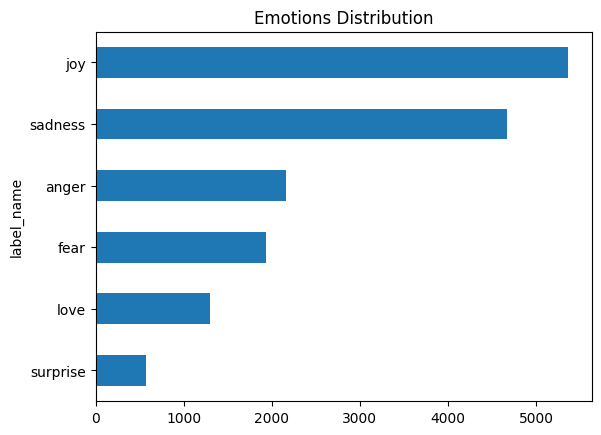

In [27]:
df['label_name'].value_counts(ascending=True).plot.barh()
plt.title('Emotions Distribution')
plt.show()

Maximum context size es longitud maxima que tiene el input, en DistilBERT es de 512 tokens

### Long size our tweets

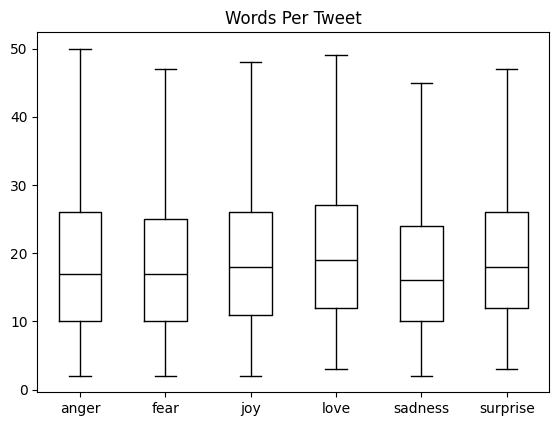

In [28]:
df['Words Per Tweet'] = df['text'].str.split().apply(len)
df.boxplot('Words Per Tweet', by='label_name', grid=False, 
           showfliers=False, color='black')
plt.suptitle('')
plt.xlabel('')
plt.show()

In [29]:
df.head()

,text,label,label_name,Words Per Tweet
0,i didnt feel humiliated,0,sadness,4
1,i can go from feeling so hopeless to so damned...,0,sadness,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,10
3,i am ever feeling nostalgic about the fireplac...,2,love,18
4,i am feeling grouchy,3,anger,4


In [30]:
# Resetea el formato al original, tenemos que quitarle el formato pandas
emotions.reset_format()

# Tokenization

## Character

In [31]:
text = 'Tokenizing text is a core task of NLP.'

In [32]:
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


In [33]:
# Numericalization: convertir cada caracter a un número para el modelo
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9, 'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18, 'z': 19}


In [34]:
len(token2idx)

20

In [35]:
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


In [36]:
categorical_df = pd.DataFrame(
    {'Name': ['Bumblebee', 'Optimus Prime', 'Megatron'],
     'Label ID': [0, 1, 2]}
)

categorical_df

,Name,Label ID
0,Bumblebee,0
1,Optimus Prime,1
2,Megatron,2


In [37]:
pd.get_dummies(categorical_df['Name']).astype(int)

,Bumblebee,Megatron,Optimus Prime
0,1,0,0
1,0,0,1
2,0,1,0


In [38]:
import torch
import torch.nn.functional as F

In [39]:
input_ids = torch.tensor(input_ids)
input_ids

tensor([ 5, 14, 12,  8, 13, 11, 19, 11, 13, 10,  0, 17,  8, 18, 17,  0, 11, 16,
         0,  6,  0,  7, 14, 15,  8,  0, 17,  6, 16, 12,  0, 14,  9,  0,  3,  2,
         4,  1])

In [40]:
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings[:2]

tensor([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

In [41]:
one_hot_encodings.shape

torch.Size([38, 20])

In [42]:
print(f'Token: {tokenized_text[0]}')
print(f'Tensor Index: {input_ids[0]}')
print(f'One-Hot Encoding: {one_hot_encodings[0]}')

Token: T
Tensor Index: 5
One-Hot Encoding: tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


## Word

In [43]:
text = 'Tokenizing text is a core task of NLP'

In [44]:
tokenized_text = text.split()
tokenized_text

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP']

luego se le pone un ID a cada palabra y hay palabras equivocadas o con diferente puntuación y se pueden generar muchas palabras y al final se pone las palabras como UNK que sería "unknow"

el problema es que se pierde mucha información

## Subword

In [45]:
from transformers import AutoTokenizer

Ese AutoTokenizer usa WordPiece, que es usado por BERT y DistilBERT

In [46]:
# model checkpoint name 
model_ckpt = 'distilbert-base-uncased'

In [47]:
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [48]:
encoded_text = tokenizer(text)

In [49]:
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [50]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text['input_ids'])
tokens

['[CLS]',
 'token',
 '##izing',
 'text',
 'is',
 'a',
 'core',
 'task',
 'of',
 'nl',
 '##p',
 '[SEP]']

In [51]:
tokenizer.convert_tokens_to_string(tokens)

'[CLS] tokenizing text is a core task of nlp [SEP]'

In [52]:
tokenizer.vocab_size

30522

In [53]:
tokenizer.model_max_length

512

In [54]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [55]:
def tokenize(batch):
    return tokenizer(batch['text'], padding=True, truncation=True)

In [56]:
print(tokenize(emotions['train'][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [57]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

In [58]:
emotions_encoded['train'].column_names

['text', 'label', 'input_ids', 'attention_mask']

In [59]:
emotions['train'][:3]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong'],
 'label': [0, 0, 3]}

In [60]:
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [61]:
# el padding hace que los tokens sean de la misma longitud
# rellena de 0s hasta completar la longitud del token más largo en el batch
print(tokenize(emotions['train'][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [62]:
print(emotions_encoded['train'][1])

{'text': 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'label': 0, 'input_ids': [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


In [63]:
len(emotions_encoded['train'][1500]['input_ids'])

87

In [64]:
len(emotions_encoded['train'][1500]['attention_mask'])

87

In [65]:
emotions_encoded['train'].features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None),
 'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None),
 'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None)}

In [66]:
emotions_encoded['train'].column_names

['text', 'label', 'input_ids', 'attention_mask']

# Llamando el PLM

El automodel convierte los tokens encodings en embeddings y alimenta el ENCODER para obtener los hidden states

In [67]:
import torch
import torch.nn.functional as F

In [68]:
from transformers import AutoModel

In [69]:
model_ckpt = 'distilbert-base-uncased'

In [70]:
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')

In [71]:
device

device(type='mps')

In [72]:
model = AutoModel.from_pretrained(model_ckpt).to(device)

## Extraer los ultimos hidden states

In [73]:
text = 'this is a test'

In [74]:
# El return_tensors='pt' convierte el texto en tensores de PyTorch
inputs = tokenizer(text, return_tensors='pt')

In [75]:
inputs

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}

In [76]:
inputs['input_ids']

tensor([[ 101, 2023, 2003, 1037, 3231,  102]])

In [77]:
inputs['attention_mask']

tensor([[1, 1, 1, 1, 1, 1]])

In [78]:
# Resultado = [batch_size, n_tokens]
inputs['input_ids'].size()

torch.Size([1, 6])

In [79]:
for j in inputs.items():
    print(j)

('input_ids', tensor([[ 101, 2023, 2003, 1037, 3231,  102]]))
('attention_mask', tensor([[1, 1, 1, 1, 1, 1]]))


calculo las salidas del modelo por eso uso torch.no_grad() porque no quiero calcular las gradientes, para ello lo paso con el modelo y obtengo las salidas

In [80]:
inputs = {k: v.to(device) for k, v in inputs.items()}
print(inputs)
with torch.no_grad():
    outputs = model(**inputs)
print(outputs)

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102]], device='mps:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]], device='mps:0')}
BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='mps:0'), hidden_states=None, attentions=None)


In [81]:
# Retorna solo el ultimo estado oculto
outputs.last_hidden_state

tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='mps:0')

In [82]:
# [batch_size, n_tokens, hidden_dim]
outputs.last_hidden_state.size()

torch.Size([1, 6, 768])

In [83]:
# Extraemos el valor del hidden state del CLS, obtenido en la salida
# Se usa porque ha sido enriquecido por toda la secuencia
outputs.last_hidden_state[:,0].size()

torch.Size([1, 768])

Aplicamos a toda la base

In [84]:
def extract_hidden_states(batch):
    inputs = {k: v.to(device) for k, v in batch.items() 
              if k in tokenizer.model_input_names}
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state

    return {'hidden_state': last_hidden_state[:,0].cpu().numpy()}

Necesitamos pasar los datos al formato de tensores

In [85]:
emotions_encoded.set_format('torch',
                            columns=['input_ids', 'attention_mask', 'label'])

In [86]:
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)

In [87]:
emotions_hidden['train'].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

In [88]:
emotions_hidden['train']['hidden_state'].size()

torch.Size([16000, 768])

## Train Classifier

In [89]:
X_train = np.array(emotions_hidden['train']['hidden_state'])
X_valid = np.array(emotions_hidden['validation']['hidden_state'])
y_train = emotions_hidden['train']['label']
y_valid = emotions_hidden['validation']['label']

X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

In [90]:
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

In [91]:
X_scaled = MinMaxScaler().fit_transform(X_train)

Usaremos UMAP para reducir a 2D pero primero necesitamos normalizar

In [92]:
mapper = UMAP(n_components=2, metric='cosine').fit(X_scaled)

In [93]:
mapper.embedding_.shape

(16000, 2)

In [94]:
df_emb = pd.DataFrame(mapper.embedding_, columns=['X', 'Y'])
df_emb['label'] = y_train
df_emb.head()

,X,Y,label
0,3.970757,6.814670,0
1,-3.246775,6.166965,0
2,4.824061,3.433407,3
3,-2.669192,4.141797,2
4,-3.704942,4.202314,3


In [95]:
emotions['train'].features['label'].names

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

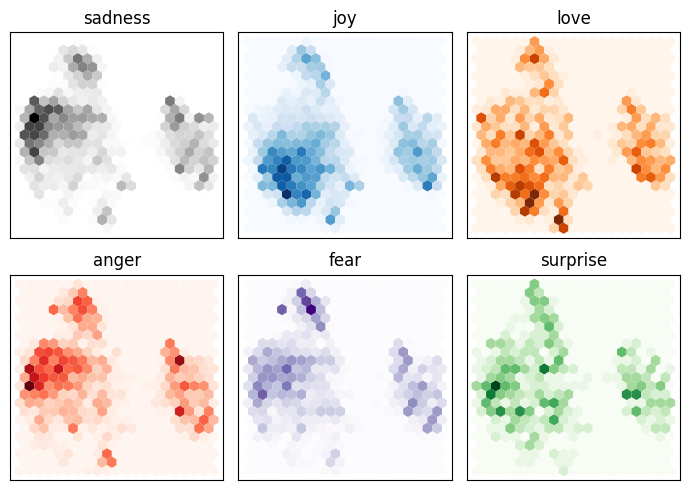

In [96]:
fig, axes = plt.subplots(2, 3, figsize=(7, 5))
axes = axes.flatten() # Convierte el array que representa los ejes en un array 1D
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = emotions['train'].features['label'].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)): 
    df_emb_sub = df_emb.query(f"label == {i}") 
    # Selecciono en subdataframe todos los valores de esa emocion y los represento
    axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap, 
                   gridsize=20, linewidths=(0,))
    axes[i].set_title(label) 
    axes[i].set_xticks([]), axes[i].set_yticks([]) 

plt.tight_layout() 
plt.show()

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

0.6335

In [99]:
from sklearn.dummy import DummyClassifier

El Dummy Classifier lo que hace es generar una clasificacion aleatoria sin basarse en los datos

In [100]:
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

Vemos que hay una mejora notoria con el baseline

In [101]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [102]:
def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize='true')
    fig, ax = plt.subplots(figsize=(5, 5))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap='Blues', values_format='.2f', ax=ax, colorbar=False)
    plt.title('Normalized Confusion Matrix')
    plt.show() 

In [103]:
y_preds = lr_clf.predict(X_valid)

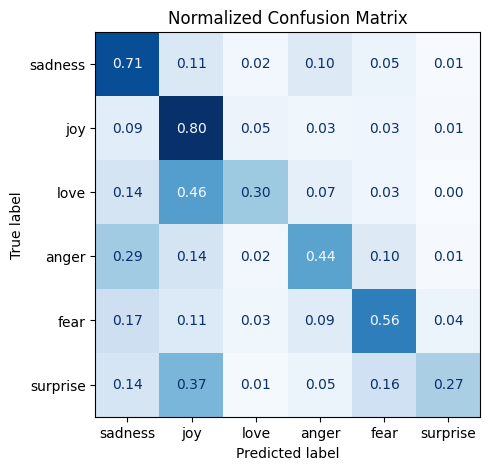

In [104]:
plot_confusion_matrix(y_preds, y_valid, labels)

# Fine-Tuning

In [105]:
from transformers import AutoModelForSequenceClassification

In [106]:
num_labels = 6

In [107]:
device

device(type='mps')

In [108]:
model = (AutoModelForSequenceClassification
         .from_pretrained(model_ckpt, num_labels=num_labels)
         .to(device))

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Ese warning es porque algunas partes fueron inicializadas de manera aleatoria

**Definimos las metricas para medir**

In [109]:
from sklearn.metrics import accuracy_score, f1_score

In [110]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1) 
    acc = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average='weighted')
    return {'accuracy': acc, 'f1': f1}

No es necesario loggear si no vamos a subir el modelo al HF hub

In [111]:
from transformers import  TrainingArguments

In [112]:
batch_size = 64 
logging_steps = len(emotions_encoded["train"]) // batch_size 
model_name = f"{model_ckpt}-finetuned-emotion" 
training_args = TrainingArguments(output_dir=model_name, 
                                  num_train_epochs=2, 
                                  learning_rate=2e-5, 
                                  per_device_train_batch_size=batch_size, 
                                  per_device_eval_batch_size=batch_size, 
                                  weight_decay=0.01, 
                                  evaluation_strategy="epoch", 
                                  disable_tqdm=False, 
                                  logging_steps=logging_steps, 
                                  push_to_hub=False, 
                                  log_level="error")

In [113]:
from transformers import Trainer 

trainer = Trainer(model=model, 
                  args=training_args, 
                  compute_metrics=compute_metrics, 
                  train_dataset=emotions_encoded["train"], 
                  eval_dataset=emotions_encoded["validation"], 
                  tokenizer=tokenizer)

/Users/wpcasas/.local/share/virtualenvs/transformers-mQ9tXch0/lib/python3.9/site-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [115]:
trainer.train()

  0%|          | 0/500 [00:00<?, ?it/s]

{'loss': 0.2153, 'grad_norm': 2.7625787258148193, 'learning_rate': 1e-05, 'epoch': 1.0}


  0%|          | 0/32 [00:00<?, ?it/s]

{'eval_loss': 0.1845960021018982, 'eval_accuracy': 0.9245, 'eval_f1': 0.925331965406494, 'eval_runtime': 3.5307, 'eval_samples_per_second': 566.464, 'eval_steps_per_second': 9.063, 'epoch': 1.0}
{'loss': 0.1485, 'grad_norm': 4.519495964050293, 'learning_rate': 0.0, 'epoch': 2.0}


  0%|          | 0/32 [00:00<?, ?it/s]

{'eval_loss': 0.16138114035129547, 'eval_accuracy': 0.9295, 'eval_f1': 0.9298719676070789, 'eval_runtime': 3.5732, 'eval_samples_per_second': 559.726, 'eval_steps_per_second': 8.956, 'epoch': 2.0}
{'train_runtime': 238.4031, 'train_samples_per_second': 134.226, 'train_steps_per_second': 2.097, 'train_loss': 0.18191473388671875, 'epoch': 2.0}


TrainOutput(global_step=500, training_loss=0.18191473388671875, metrics={'train_runtime': 238.4031, 'train_samples_per_second': 134.226, 'train_steps_per_second': 2.097, 'train_loss': 0.18191473388671875, 'epoch': 2.0})

In [116]:
preds_output = trainer.predict(emotions_encoded["validation"])

  0%|          | 0/32 [00:00<?, ?it/s]

In [117]:
preds_output.metrics

{'test_loss': 0.16138114035129547,
 'test_accuracy': 0.9295,
 'test_f1': 0.9298719676070789,
 'test_runtime': 3.5175,
 'test_samples_per_second': 568.586,
 'test_steps_per_second': 9.097}

In [120]:
y_preds = np.argmax(preds_output.predictions, axis=1)

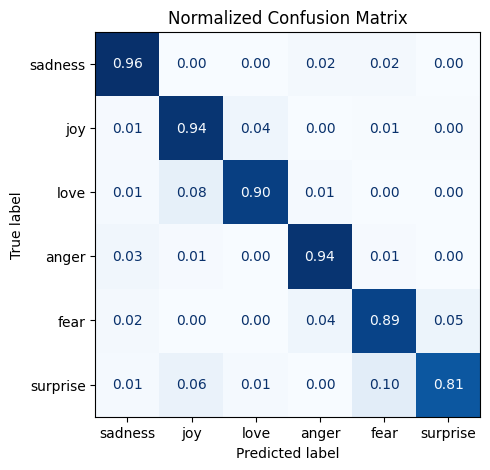

In [121]:
plot_confusion_matrix(y_preds, y_valid, labels)

Analizando el error

In [124]:
from torch.nn.functional import cross_entropy

In [125]:
def forward_pass_with_label(batch): 
    # Place all input tensors on the same device as the model 
    inputs = {k:v.to(device) for k,v in batch.items() 
              if k in tokenizer.model_input_names} 
    with torch.no_grad(): 
        output = model(**inputs) 
        pred_label = torch.argmax(output.logits, axis=-1) 
        loss = cross_entropy(output.logits, batch["label"].to(device), 
                             reduction="none") 
        # Place outputs on CPU for compatibility with other dataset columns 
        return {"loss": loss.cpu().numpy(), 
                "predicted_label": pred_label.cpu().numpy()}

In [126]:
# Convert our dataset back to PyTorch tensors 
emotions_encoded.set_format("torch", 
                            columns=["input_ids", "attention_mask", "label"]) 

# Compute loss values 
emotions_encoded["validation"] = emotions_encoded["validation"].map( 
    forward_pass_with_label, batched=True, batch_size=16)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [127]:
emotions_encoded.set_format("pandas") 
cols = ["text", "label", "predicted_label", "loss"] 
df_test = emotions_encoded["validation"][:][cols] 
df_test["label"] = df_test["label"].apply(label_int2str) 
df_test["predicted_label"] = (df_test["predicted_label"] 
                              .apply(label_int2str))

In [128]:
df_test.sort_values("loss", ascending=False).head(10)

,text,label,predicted_label,loss
1111,im lazy my characters fall into categories of ...,joy,fear,6.610148
318,i felt ashamed of these feelings and was scare...,fear,sadness,6.539531
1870,i guess i feel betrayed because i admired him ...,joy,sadness,6.529499
1963,i called myself pro life and voted for perry w...,joy,sadness,6.264380
1500,i guess we would naturally feel a sense of lon...,anger,sadness,5.569851
1801,i feel that he was being overshadowed by the s...,love,sadness,5.463817
1950,i as representative of everything thats wrong ...,surprise,sadness,5.368449
1852,i arrived home with a strange feeling of happi...,sadness,fear,5.037272
1840,id let you kill it now but as a matter of fact...,joy,fear,4.724541
1836,i got a very nasty electrical shock when i was...,fear,anger,4.595573


## Save the model

In [129]:
from transformers import pipeline

In [136]:
model_id = 'distilbert-base-uncased-finetuned-emotion/checkpoint-500/'

In [137]:
classifier = pipeline('text-classification', model=model_id)

In [138]:
custom_tweet = "I saw a movie today and it was really good."

In [139]:
preds = classifier(custom_tweet, top_k=None)

In [140]:
preds

[{'label': 'LABEL_1', 'score': 0.9846161007881165},
 {'label': 'LABEL_0', 'score': 0.004512859974056482},
 {'label': 'LABEL_3', 'score': 0.0034895087592303753},
 {'label': 'LABEL_2', 'score': 0.003170951269567013},
 {'label': 'LABEL_5', 'score': 0.002300049876794219},
 {'label': 'LABEL_4', 'score': 0.0019106337567791343}]

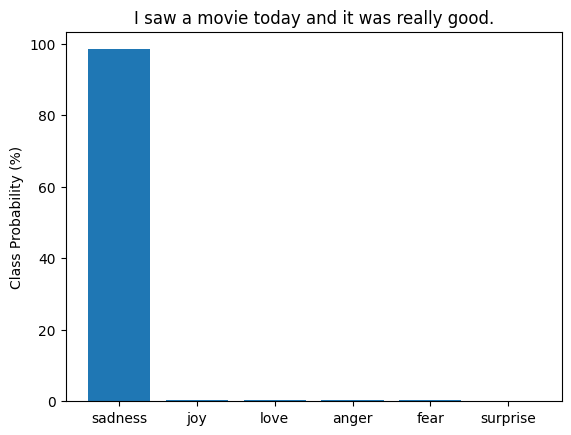

In [141]:
preds_df = pd.DataFrame(preds)
plt.bar(labels, 100*preds_df['score'], color='C0')
plt.title(f'{custom_tweet}')
plt.ylabel('Class Probability (%)')
plt.show()